### Classifier Chain
Reference: scikit learn Classifier Chain

**Intro**:<br>
1. Use the yeast dataset (X, Y) which contains 2417 datapoints with 103 features and 14 possible labels.
2. Each data ponit has at least one label.

In [4]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# A multi-label model that arranges binary classifiers into a chain
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression

In [65]:
# Load a multi-label dataset from https://www.openml.org/d/40597

X, Y = fetch_openml('yeast', version=4, return_X_y=True) # Read datasets 

Y = Y == 'TRUE' # Convert values in Y to booleans

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, 
                                                    random_state=0) # Split X and Y to train and test

In [88]:
# Print the dtype and shape of X

print(type(X))
print(X.shape)

# Print first element in X
pd.DataFrame(X).head()

<class 'numpy.ndarray'>
(2417, 103)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


In [89]:
# Print the dtype and shape of X

print(type(Y))
print(Y.shape)

# Print first element in X
pd.DataFrame(Y).head()

<class 'numpy.ndarray'>
(2417, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,True,True,False,False,False,True,True,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,True,True,False
3,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,False,False,False,False


In [82]:
# Print the dtype and shape of X_train

print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(1933, 103)


In [83]:
# Print the dtype and shape of Y_train

print(type(Y_train))
print(Y_train.shape)

<class 'numpy.ndarray'>
(1933, 14)


In [84]:
# Print the dtype and shape of X_test

print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(484, 103)


In [85]:
# Print the dtype and shape of Y_test

print(type(Y_test))
print(Y_test.shape)

<class 'numpy.ndarray'>
(484, 14)


3. As a baseline we first train a logistic regression calssfifier for each of the 14 labels.
    - baseline: independent models
4. To evaluate the performance of these classifiers we predict on a held-out test set and calculate the jaccard score for each sample.

In [66]:
# Fit an independent logistic regression model for each class using the OneVsRestClassifier wrapper.

base_lr = LogisticRegression() # Create a lr object

ovr = OneVsRestClassifier(base_lr) # Create a ovr object using lr

ovr.fit(X_train, Y_train) # Fit on train and Y's values must be booleans

Y_pred_ovr = ovr.predict(X_test) # Predict Y

over_jaccard_socre = jaccard_score(Y_test, Y_pred_ovr, average='samples') # Compute overall jaccard score

In [78]:
# lr and over objects

print(base_lr)
print(ovr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
 

In [90]:
# Quickview of Y_test
pd.DataFrame(Y_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,True,True,False,False,False,True,True,True,False
1,False,False,False,False,True,True,False,False,False,False,False,True,True,False
2,False,False,False,True,True,True,True,False,False,False,False,True,True,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,False


In [86]:
# Quickview of Y_pred_over
pd.DataFrame(Y_pred_ovr).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,1,1,1,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,1,0


5. Create 10 classifier chains:
    - Each classifier chain contains a logistic regression model for each of the 14 labels. 
    - The models in each chain are ordered randomly.
    - Besides 103 features, each model gets the predictions of the preceding models in the chain as features.
    - **These additional features allow each chain to exploit corelations among the classes.**
6. The Jaccard similarity score for each chain tends to be greater than that of the set independent logistic models.
    - The higher the percentage, the more similar the two populations. 
    - Because the models in each chain are arranged randomly there is significant variation in performance among the chains. 
    - Presumably there is an optimal ordering of the classes in a chain that will yield the best performance. However we do not know that ordering a priori.
    
7.  Instead we can construct an voting ensemble of classifier chains by averaging the binary predictions of the chains and apply a threshold of 0.5. 

In [68]:
# Fit an ensemble of logistic regression classifier chains and 
# take the average prediction of all the chains

chains = [ClassifierChain(base_lr, order='random', random_state=i) 
          for i in range(10)] # Use list comprehension to create 10 chains

for chain in chains:
    chain.fit(X_train, Y_train) # Fit 10 classifier chains on train

Y_pred_chains = np.array([chain.predict(X_test) 
                          for chain in chains]) # Create np array of predcited Y by 10 classifier chains

chain_jaccard_scores = [jaccard_score(Y_test, Y_pred_chain >= .5,average='samples') 
                        for Y_pred_chain in Y_pred_chains] # List the jaccard score by 10 classifier chains

Y_pred_ensemble = Y_pred_chains.mean(axis=0) # Take the mean of Y_pred_chains

ensemble_jaccard_score = jaccard_score(Y_test, 
                                       Y_pred_ensemble >= .5, 
                                       average='samples') # Compute the ensemble jaccard score

In [69]:
# Put all the jaccard score together

model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

# Create a model names

model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

x_pos = np.arange(len(model_names)) # Create the positiions for each bar in the barplot

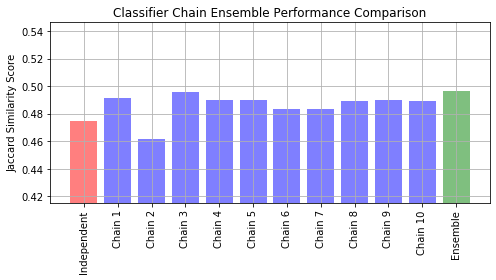

In [70]:
# Plot the Jaccard similarity scores for the indepedent model, each of the chains, 
# and the ensemble (note that the vertical axis on this plot does not begin at 0)

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

The Jaccard similarity score of the ensemble is greater than that of the independent models and tends to exceed the score of each chain in the ensemble (although this is not guaranteed with randomly ordered chains).